In [4]:
import cv2

def extract_first_frame(video_path, output_image_path):
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    # Check if the video was opened successfully
    if not video_capture.isOpened():
        print("Error: Could not open video.")
        return False

    # Read the first frame
    success, frame = video_capture.read()

    # Check if the frame was read successfully
    if success:
        # Save the first frame as an image file
        cv2.imwrite(output_image_path, frame)
        print(f"First frame extracted and saved as {output_image_path}")
    else:
        print("Error: Could not read frame.")
        return False

    # Release the video capture object
    video_capture.release()
    return True

# Example usage
video_path = '/content/drive/MyDrive/VID_20240308_183200.mp4'
output_image_path = '/content/drive/MyDrive/sot image/sot.jpg'
extract_first_frame(video_path, output_image_path)


First frame extracted and saved as /content/drive/MyDrive/sot image/sot.jpg


True

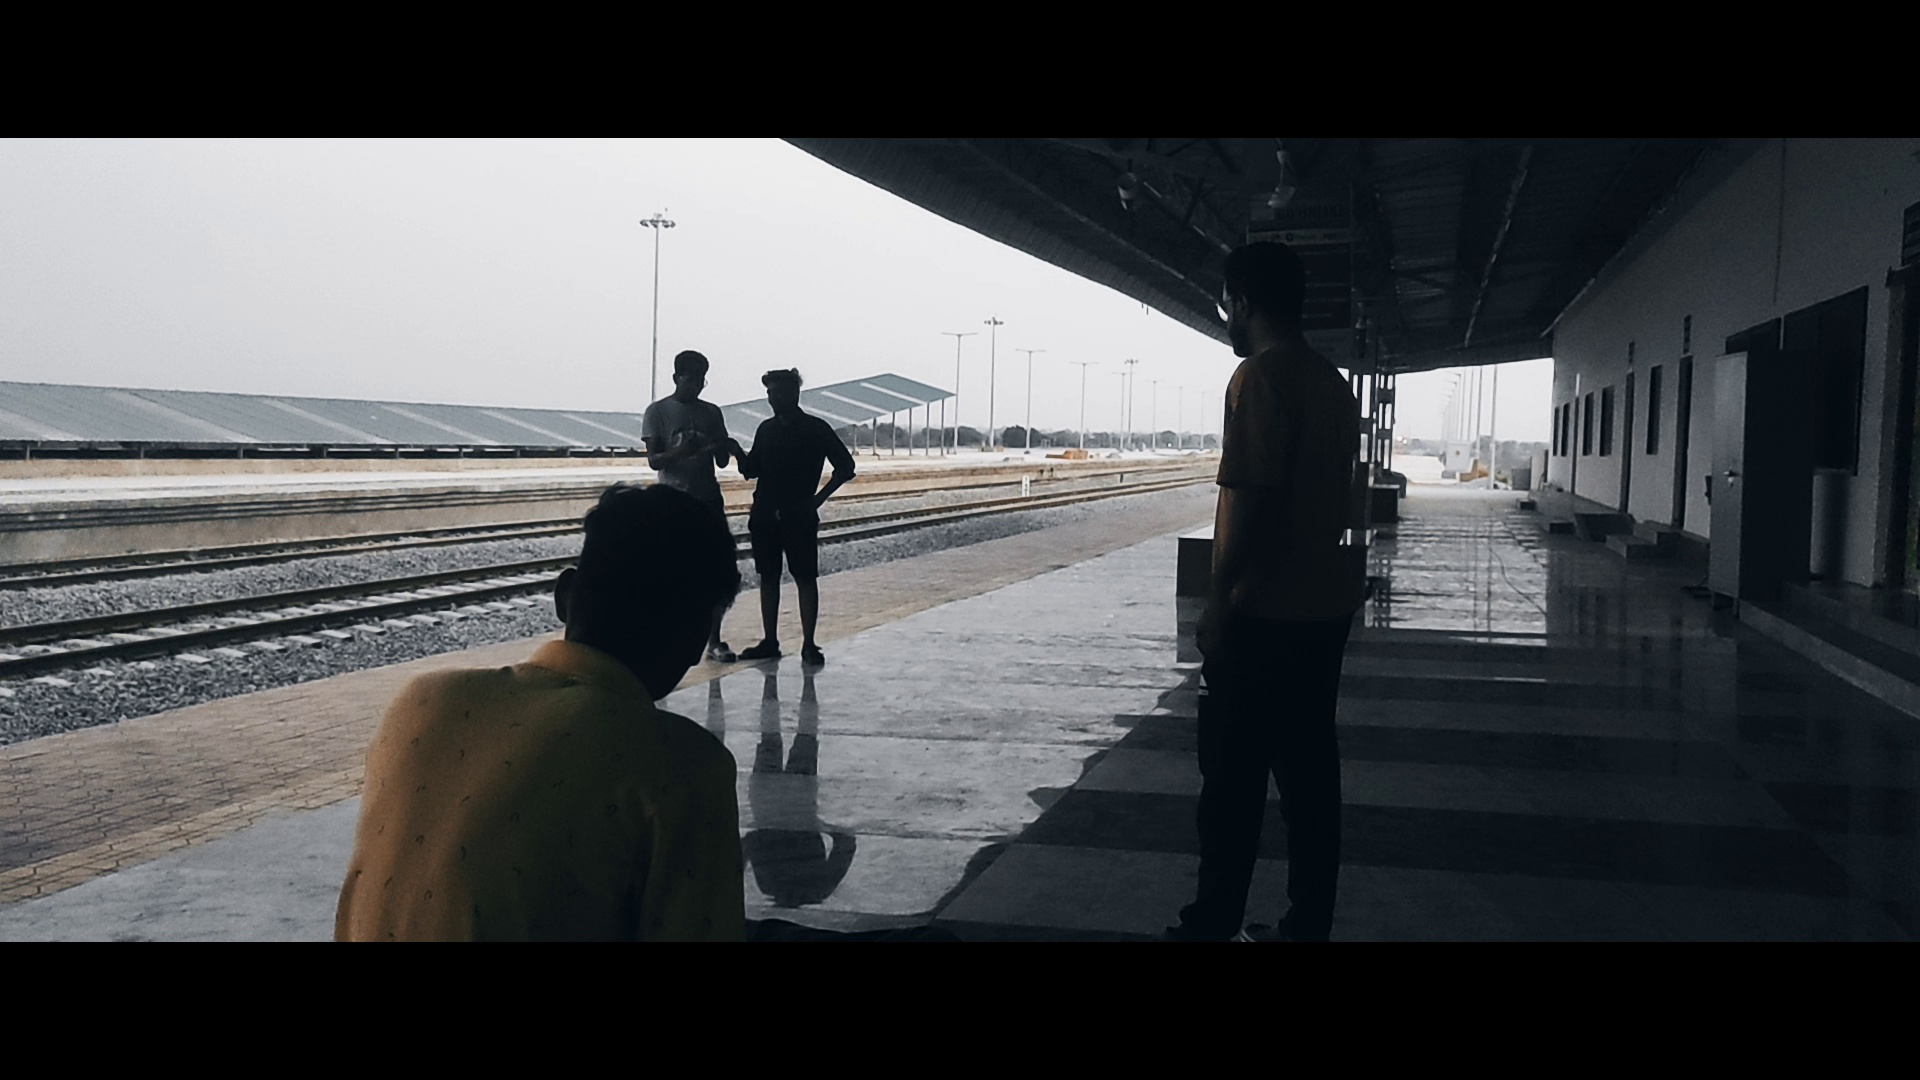

In [35]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image data from the file path
image = cv2.imread("/content/drive/MyDrive/sot image/sot.jpg")

# Display the image using cv2_imshow()
cv2_imshow(image)

In [6]:
!pip install ultralytics
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.3/760.3 kB 9.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [34]:
model=YOLO('yolov8n.pt')
result=model.track(source="/content/drive/MyDrive/sot image/sot.jpg",save=True)


image 1/1 /content/drive/MyDrive/sot image/sot.jpg: 384x640 4 persons, 196.1ms
Speed: 4.1ms preprocess, 196.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/track7


In [20]:
human_ids = set()
for result in result:
    if result is not None and result.boxes is not None:
        for box in result.boxes:
            if model.names[int(box.cls)] == 'person':
                box_id = box.id
                if box_id is not None:
                    human_ids.add(box_id.item())
if human_ids:
    print("Detected Human IDs:", human_ids)

Detected Human IDs: {1.0, 2.0, 3.0, 4.0}


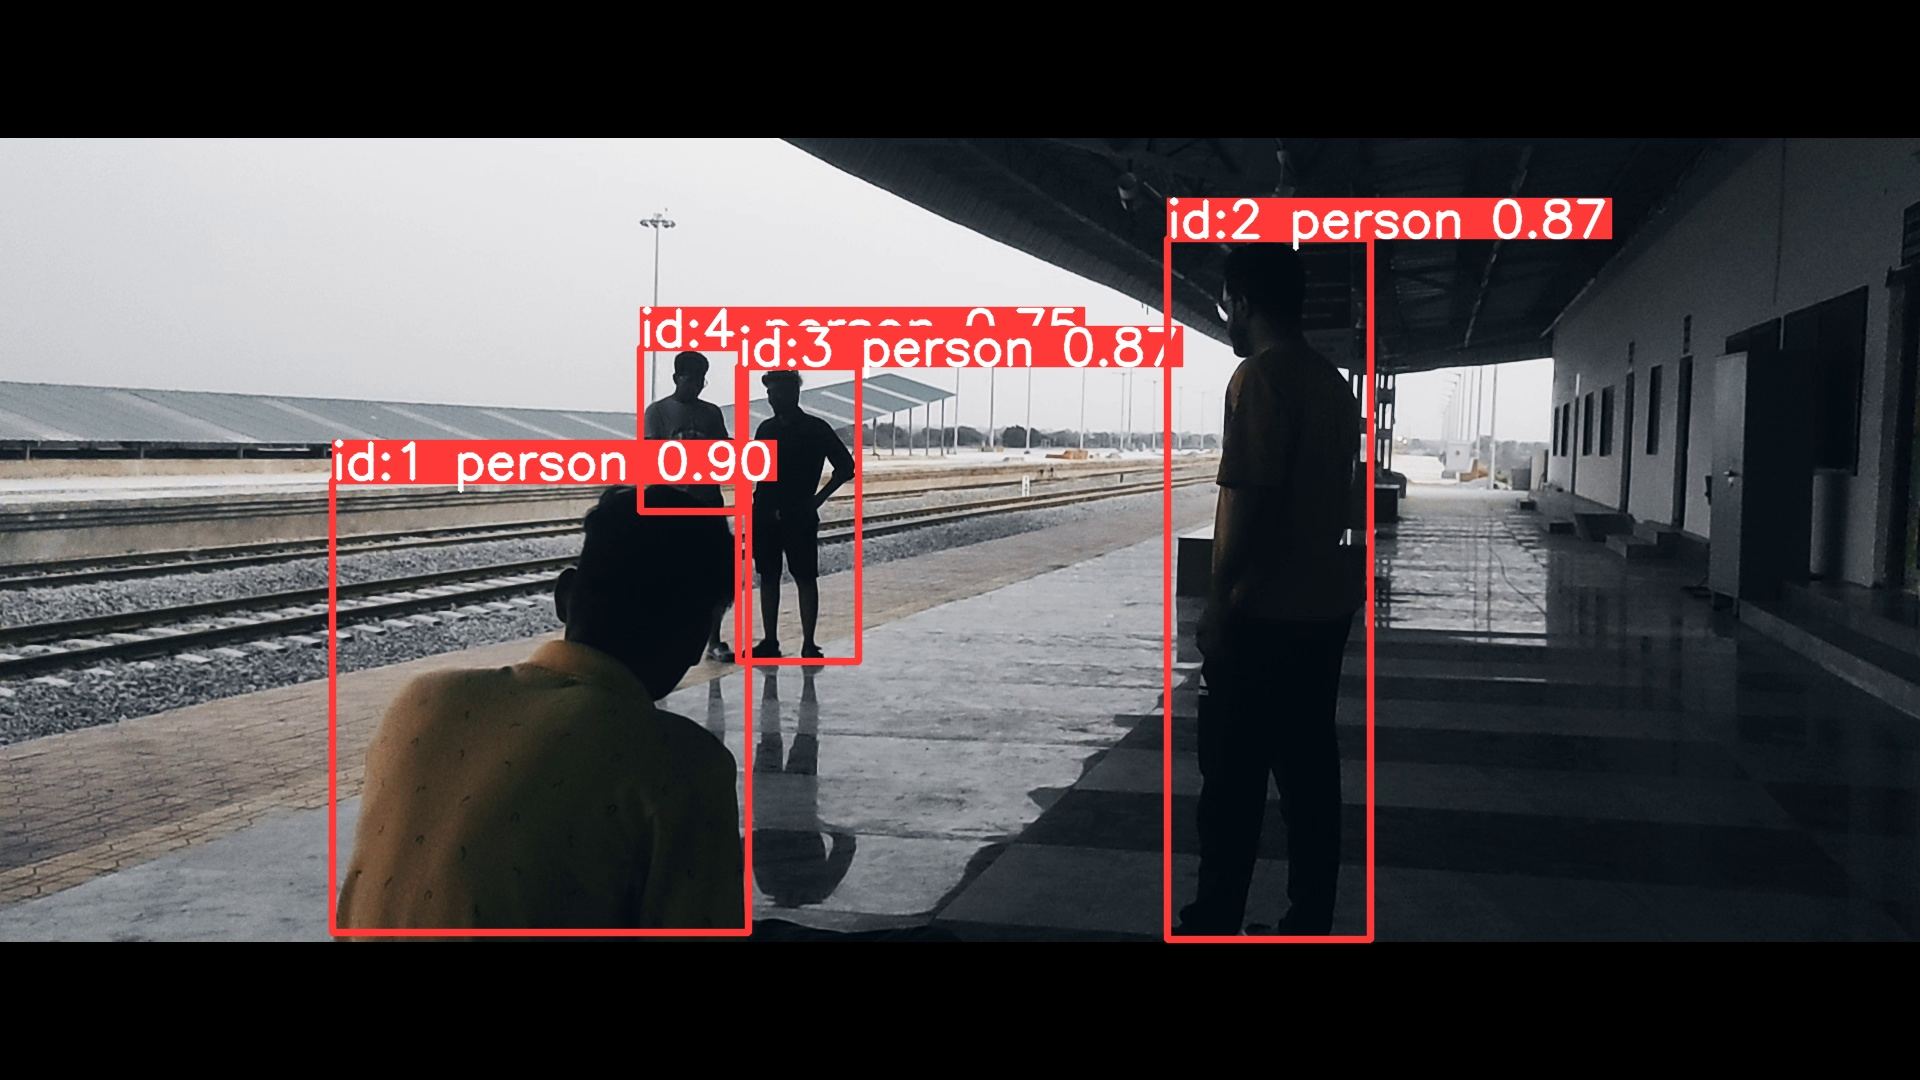

In [36]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image data from the file path
image = cv2.imread("/content/drive/MyDrive/sot image/track.jpg")

# Display the image using cv2_imshow()
cv2_imshow(image)

In [37]:
import cv2

results = model.track(source="/content/drive/MyDrive/VID_20240308_183200.mp4", save=False)

# Open the video file
video_path = "/content/drive/MyDrive/VID_20240308_183200.mp4"
video_capture = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object to save the output video
output_video_path = "/content/drive/MyDrive/tracked.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

x=int(input("Enter the id of the person to Track: "))
id_color_map = {
    x: (0, 255, 0),  # Green for ID 1
}
default_color = (0, 0, 255)  # Red for other IDs

frame_index = 0
while True:
    # Read a new frame
    success, frame = video_capture.read()
    if not success:
        break

    # Get results for the current frame
    frame_results = results[frame_index]  # Access results for the current frame

    for result in frame_results.boxes:
        # Unpack result
        obj_id = int(result.id)  # Ensure the ID is retrieved as an integer
        bbox = result.xyxy[0].tolist()  # Get bounding box coordinates
        confidence = result.conf[0].item()  # Convert tensor to a scalar value

        # Get bounding box coordinates
        x1, y1, x2, y2 = map(int, bbox)

        # Determine the color for the bounding box
        color = id_color_map.get(obj_id, default_color)

        # Draw the bounding box
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        label = f"ID: {obj_id} Conf: {confidence:.2f}"
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Write the frame with the bounding boxes to the output video
    output_video.write(frame)
    frame_index += 1

# Release resources
video_capture.release()
output_video.release()
cv2.destroyAllWindows()

print(f"Output video saved at: {output_video_path}")




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/447) /content/drive/MyDrive/VID_20240308_183200.mp4: 384x640 4 persons, 258.3ms
video 1/1 (frame 2/447) /content/drive/MyDrive/VID_20240308_183200.mp4: 384x640 4 persons, 301.9ms
video 1/1 (frame 3/447) /content/drive/MyDrive/VID_20240308_183200.mp4: 384x640 4 persons, 238.7ms
video 1/1 (frame 4/447) /content/drive/MyDrive/VID_20240308_183200.mp4: 384x640 4 persons, 276.7ms
video 1/1 (frame 5/447) /content/drive/MyDrive/VID_20240308_

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
